## using gradient desent

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

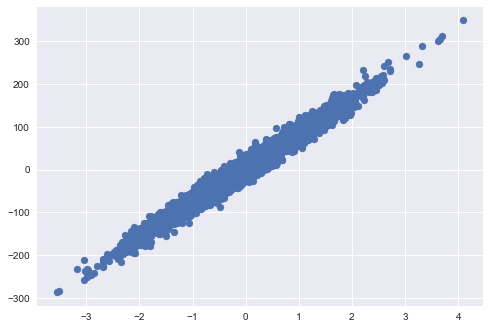

In [21]:
X=pd.read_csv(r"C:\Users\hp\Desktop\Linear_X_Train.csv")
Y=pd.read_csv(r"C:\Users\hp\Desktop\Linear_Y_Train.csv")

plt.style.use("seaborn")
plt.scatter(X,Y)
plt.show()

In [22]:
X=X.values
Y=Y.values

mean=X.mean()
std=X.std()
print(mean,std)
#and data is already normalized so no need to do it again

-0.03779466168006855 0.9920801322508517


In [23]:
def hyp(x,theta):
    y_=theta[0]+theta[1]*x
    return y_

In [24]:
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        y_=hyp(X[i],theta)
        y=Y[i]
        grad[0]+=(y_-y)
        grad[1]+=(y_-y)*X[i]
    return grad/m

In [60]:
def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    for i in range(m):
        y_=hyp(X[i],theta)
        total_error+=(y_-Y[i])**2
    return total_error/m

def gradientDesent(X,Y,max_steps=100,learning_rate=0.1):
    error_list=[]
    theta_list=[]
    theta=np.zeros((2,))
    for i in range(max_steps):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)[0]
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list

In [61]:
theta,error_list,theta_list=gradientDesent(X,Y)
y_=hyp(X,theta)
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


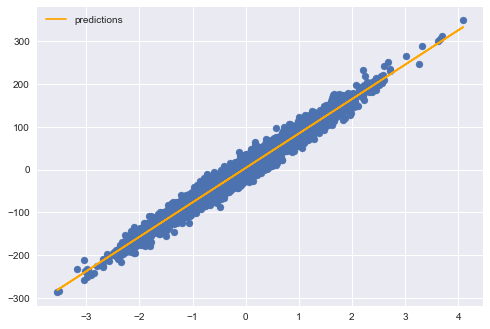

In [28]:
#training + prediction
plt.scatter(X,Y)
plt.plot(X,y_,label='predictions',color="orange")
plt.legend()
plt.show()

In [37]:
# x_test=pd.read_csv(r"C:\Users\hp\Desktop\Linear_X_test.csv").values
# y_test=hyp(x_test,theta)
pd.DataFrame(y_test,columns=['y']).to_csv("test.csv",index=False)

#### and for lenear regression r2 or cofficient of determination is used for evaluation

#### r2=1-((sum((y-y_)**2)/(sum((y-y.mean())**2))

#### yeh zero kab hoga when y_ ==y.mean()

In [32]:
def r2_score(Y,y_):
    num=np.sum((Y-y_)**2)
    denom=np.sum((Y-Y.mean())**2)
    score=(1-num/denom)
    return score*100
print(r2_score(Y,y_))

97.09612220841039


### basics of surface plot

In [9]:
a=np.array([1,2,3])
b=np.array([4,5,6,7])
a,b=np.meshgrid(a,b)
print(a)
print(b)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


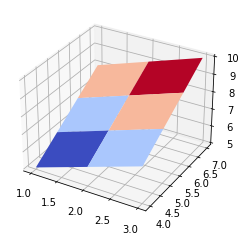

In [18]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(a,b,a+b,cmap='coolwarm')
plt.show()

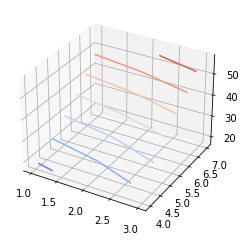

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(a,b,a**2+b**2,cmap='coolwarm')
plt.show()

#### we can also rotate this in any direction in .py form

In [38]:
theta

array([ 3.72687896, 80.54086647])

In [39]:
#loss function

t0=np.arange(-40,40,1)
t1=np.arange(40,120,1)

t0,t1=np.meshgrid(t0,t1)
t0.shape

(80, 80)

In [66]:
J=np.zeros(t0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_=t0[i,j]+t1[i,j]*X
        J[i,j]=np.sum((Y-y_)**2)/Y.shape[0]

In [55]:
J

array([[13459803.63567684, 13147086.2199127 , 12841868.80414856, ...,
        11325562.62183825, 11590345.20607411, 11862627.79030998],
       [13176180.79852381, 12863179.92279707, 12557679.04707034, ...,
        11020113.36756499, 11284612.49183825, 11556611.61611151],
       [12899950.34706022, 12586666.01137088, 12280881.67568154, ...,
        10722056.49898116, 10986272.16329182, 11257987.82760248],
       ...,
       [13250965.70218888, 12916421.86930451, 12589378.03642013, ...,
         9436090.57009185,  9679046.73720747,  9929502.9043231 ],
       [13536556.56312257, 13201729.27027559, 12874401.97742862, ...,
         9699855.0139053 ,  9942527.72105832, 10192700.42821134],
       [13829539.8097457 , 13494429.05693612, 13166818.30412654, ...,
         9971011.84340818, 10213401.0905986 , 10463290.33778903]])

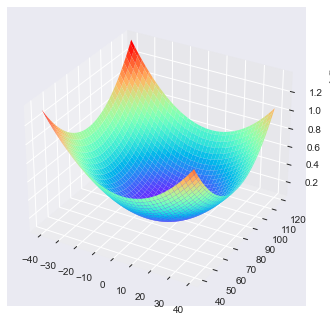

In [59]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(t0,t1,J,cmap='rainbow')
plt.show()

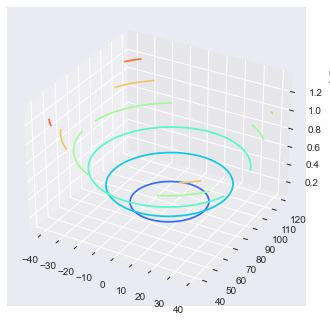

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(t0,t1,J,cmap='rainbow')
plt.show()

In [64]:
theta_list

array([[6.83868968e-02, 7.92470475e+00],
       [1.59886257e-01, 1.50685683e+01],
       [2.69235673e-01, 2.15086418e+01],
       [3.91990186e-01, 2.73143617e+01],
       [5.24411770e-01, 3.25483040e+01],
       [6.63372704e-01, 3.72668626e+01],
       [8.06271177e-01, 4.15208609e+01],
       [9.50957645e-01, 4.53561033e+01],
       [1.09567064e+00, 4.88138714e+01],
       [1.23898084e+00, 5.19313710e+01],
       [1.37974252e+00, 5.47421355e+01],
       [1.51705121e+00, 5.72763885e+01],
       [1.65020716e+00, 5.95613715e+01],
       [1.77868353e+00, 6.16216381e+01],
       [1.90209897e+00, 6.34793198e+01],
       [2.02019391e+00, 6.51543652e+01],
       [2.13281013e+00, 6.66647559e+01],
       [2.23987321e+00, 6.80267004e+01],
       [2.34137740e+00, 6.92548093e+01],
       [2.43737276e+00, 7.03622530e+01],
       [2.52795414e+00, 7.13609042e+01],
       [2.61325174e+00, 7.22614656e+01],
       [2.69342323e+00, 7.30735854e+01],
       [2.76864695e+00, 7.38059615e+01],
       [2.839116

In [63]:
theta_list=np.array(theta_list)


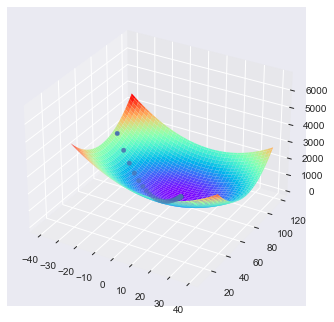

In [67]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(t0,t1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

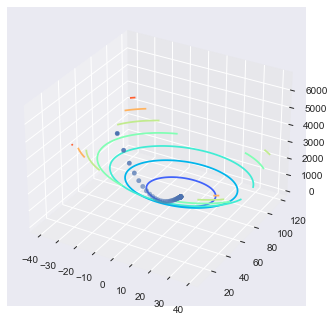

In [68]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(t0,t1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

## Multilinear Regression

In [4]:
from sklearn.datasets import load_boston
import numpy as np

In [3]:
boston=load_boston()

X=boston.data
y=boston.target
print(X.shape,y.shape)

(506, 13) (506,)


In [75]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
import pandas as pd
df=pd.DataFrame(X)
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#normalization

u=np.mean(X,axis=0)
std=np.std(X,axis=0)

In [7]:
X=(X-u)/std

In [8]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [9]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        , -0.41344658, -0.48772236, ...,  1.17646583,
         0.44105193, -0.98304761],
       [ 1.        , -0.40776407, -0.48772236, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [ 1.        , -0.41500016, -0.48772236, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
def hyp(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e=0.0
    y_=hyp(X,theta)
    e=np.sum((y-y_)**2)
    
    return e/X.shape[0]

def gradient(X,y,theta):
    y_=hyp(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    
    return grad/m

def gradient_desent(X,y,learning_rate=0.1,max_steps=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_steps):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list
    

In [13]:
theta,error_list=gradient_desent(X,y)

In [14]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

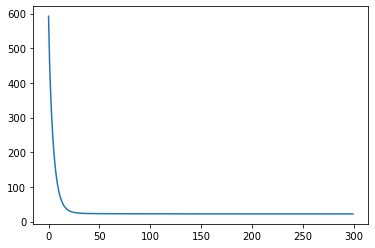

In [15]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

## Scikit-learn

In [37]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression

%matplotlib notebook

In [51]:
X,y=make_regression(n_samples=1000,n_features=2,n_informative=1,noise=10,random_state=1)

In [18]:
print(X.shape,y.shape)

(1000, 2) (1000,)


<IPython.core.display.Javascript object>


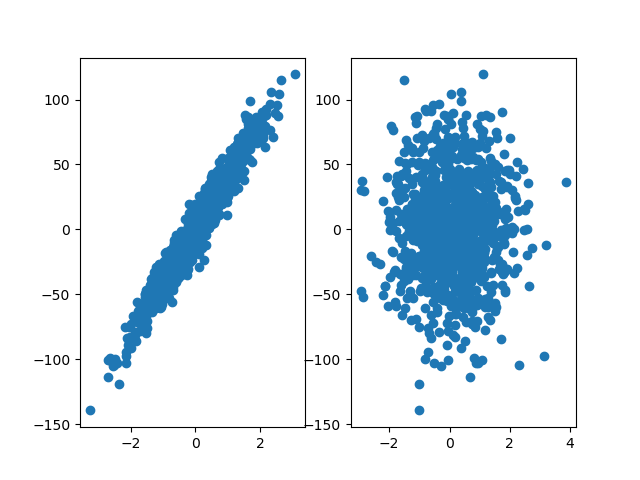

In [43]:
plt.subplot(1,2,1)
plt.scatter(X[:,0],y)

plt.subplot(1,2,2)
plt.scatter(X[:,1],y)

In [44]:
np.std(X[:,1])

1.0144516778184138

<IPython.core.display.Javascript object>


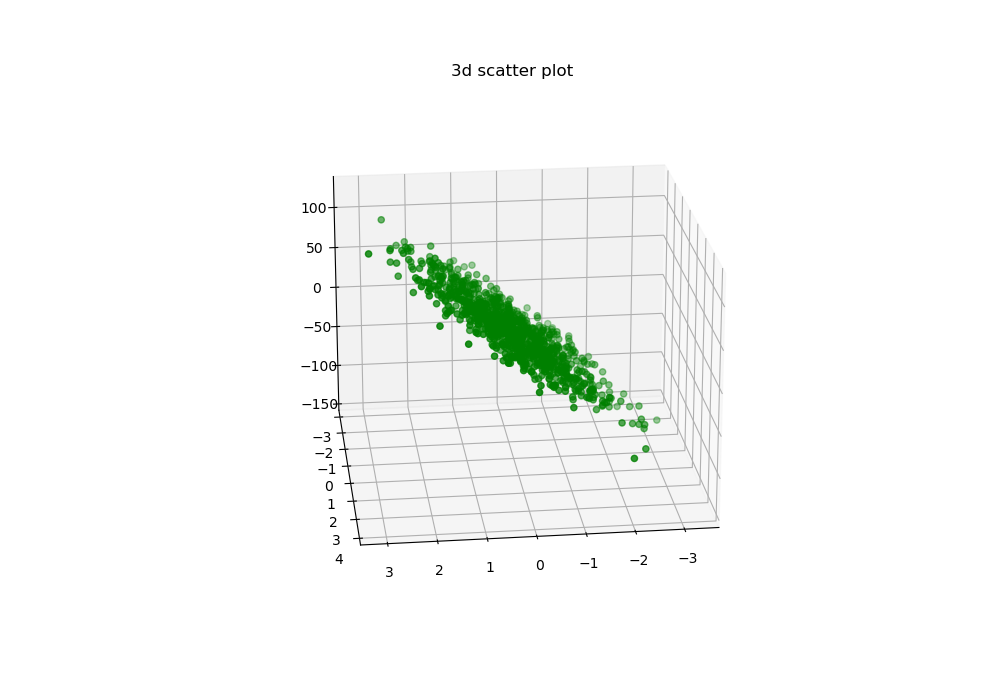

In [46]:
from mpl_toolkits import mplot3d
%matplotlib notebook

fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection="3d")

ax.scatter3D(X[:,0],X[:,1],y,color="green")
plt.title("3d scatter plot")
plt.show()

### As we can vizualize plan will pass through this

In [47]:
from sklearn.linear_model import LinearRegression

In [64]:
model=LinearRegression(normalize=True)

In [65]:
#training (decides parameter)
model.fit(X,y)

LinearRegression(normalize=True)

In [66]:
model.coef_

array([87.64399715,  0.19506063])

In [67]:
model.intercept_

0.05387148779258899

In [68]:
model.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}

In [69]:
model.predict([X[0],X[1]])

array([-128.13010102,  -68.56133458])

In [70]:
print(y[0],y[1])

-129.49142895712546 -72.90042033913113


In [71]:
model.score(X,y)

0.9876578548379635